In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns


In [66]:
customer = pd.read_csv('C:/Users/rhythm/Desktop/Data Analytics/python upload projects/Python Foundation Case Study 1 - Retail Case Study/Case Study 1 - Retail Case Study/Customer.csv')
product = pd.read_csv('C:/Users/rhythm/Desktop/Data Analytics/python upload projects/Python Foundation Case Study 1 - Retail Case Study/Case Study 1 - Retail Case Study/prod_cat_info.csv')
transactions = pd.read_csv('C:/Users/rhythm/Desktop/Data Analytics/python upload projects/Python Foundation Case Study 1 - Retail Case Study/Case Study 1 - Retail Case Study/Transactions.csv')

In [67]:
customer.head(2)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0


In [68]:
product.head(2)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [69]:
transactions.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop


In [70]:
# 1)
product.rename(columns={'prod_sub_cat_code':'prod_subcat_code'},inplace=True)
Customer_final = transactions.merge(customer,left_on='cust_id',right_on='customer_Id',how='inner').merge(product, on=['prod_cat_code','prod_subcat_code'],how='inner' )

In [73]:
Customer_final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,270351,26-09-1981,M,5.0,Clothing,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.3,4265.3,e-Shop,270351,26-09-1981,M,5.0,Clothing,Women


In [72]:
# 2.1) 
Customer_final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
customer_Id           int64
DOB                  object
Gender               object
city_code           float64
prod_cat             object
prod_subcat          object
dtype: object

In [8]:
Customer_final.duplicated().sum()

13

In [9]:
Customer_final.drop_duplicates(inplace=True)

In [10]:
Customer_final.duplicated().sum()

0

In [11]:
Customer_final["tran_date"] = pd.to_datetime(Customer_final["tran_date"],format= 'mixed')

In [12]:
# 2b top 10 observations
Customer_final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,Women
1,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,Women
2,18505840838,271509,2013-12-16,1,1,3,1229,387.135,4074.135,Flagship store,271509,08-06-1981,M,3.0,Clothing,Women
3,92814475704,267750,2013-08-16,1,1,-4,-284,119.280,-1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,Women
4,92814475704,267750,2013-07-08,1,1,4,284,119.280,1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,Women
5,4737317330,269345,2011-07-29,1,1,5,1141,599.025,6304.025,MBR,269345,26-06-1970,F,10.0,Clothing,Women
6,44425889101,274987,2012-03-18,1,1,4,897,376.740,3964.740,Flagship store,274987,08-10-1983,M,2.0,Clothing,Women
7,90501340928,271817,2012-02-19,1,1,1,1122,117.810,1239.810,TeleShop,271817,24-12-1989,M,8.0,Clothing,Women
8,99335419136,268755,2012-12-13,1,1,3,1181,372.015,3915.015,e-Shop,268755,15-07-1984,F,8.0,Clothing,Women
9,35030444164,268129,2011-11-18,1,1,5,1047,549.675,5784.675,MBR,268129,07-08-1982,F,9.0,Clothing,Women


In [13]:
# bottom 10 observations
Customer_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat
23043,3387244829,269114,2011-07-15,4,4,1,388,40.740,428.740,e-Shop,269114,22-01-1989,F,5.0,Bags,Women
23044,76906459516,267940,2011-06-15,4,4,2,1263,265.230,2791.230,Flagship store,267940,09-06-1979,M,9.0,Bags,Women
23045,73549617163,271334,2011-05-07,4,4,5,263,138.075,1453.075,e-Shop,271334,08-12-1983,F,10.0,Bags,Women
23046,75339646315,274827,2011-02-05,4,4,4,1381,580.020,6104.020,e-Shop,274827,27-12-1988,F,8.0,Bags,Women
23047,6650926717,268110,2011-05-04,4,4,4,1036,435.120,4579.120,MBR,268110,06-03-1976,M,2.0,Bags,Women
23048,7173864364,271157,2011-09-04,4,4,5,788,413.700,4353.700,Flagship store,271157,15-10-1973,F,6.0,Bags,Women
23049,5618131425,272010,2011-03-03,4,4,2,1150,241.500,2541.500,MBR,272010,22-12-1972,F,5.0,Bags,Women
23050,18727956164,267161,2011-02-23,4,4,5,668,350.700,3690.700,e-Shop,267161,08-05-1981,M,9.0,Bags,Women
23051,60416814232,273281,2011-02-18,4,4,4,202,84.840,892.840,Flagship store,273281,14-12-1988,F,9.0,Bags,Women
23052,83245680995,273723,2011-01-26,4,4,4,1477,620.340,6528.340,e-Shop,273723,21-01-1984,F,4.0,Bags,Women


In [14]:
# 2c 
Customer_final.describe()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code
count,2.304000e+04,23040.000000,23040,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23032.000000
mean,5.006955e+10,271021.880252,2012-08-11 01:00:37.500000,6.148785,3.763498,2.435764,637.094965,248.677488,2109.865226,271021.880252,5.483067
min,3.268991e+06,266783.000000,2011-01-02 00:00:00,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,266783.000000,1.000000
25%,2.493315e+10,268935.000000,2011-10-31 00:00:00,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,268935.000000,3.000000
50%,5.009188e+10,270980.500000,2012-08-12 00:00:00,5.000000,4.000000,3.000000,710.000000,199.080000,1756.950000,270980.500000,5.000000
75%,7.532632e+10,273114.250000,2013-05-18 00:00:00,10.000000,5.000000,4.000000,1109.000000,365.767500,3570.255000,273114.250000,8.000000
max,9.998755e+10,275265.000000,2014-12-02 00:00:00,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,275265.000000,10.000000
std,2.898062e+10,2431.573668,NaN,3.726197,1.677091,2.264326,621.727374,187.188311,2505.610295,2431.573668,2.863331


In [15]:
# 2d
Customer_final.loc[:,Customer_final.dtypes=="object"].describe()

,Store_type,DOB,Gender,prod_cat,prod_subcat
count,23040,23040,23031,23040,23040
unique,4,3987,2,6,18
top,e-Shop,27-12-1988,M,Books,Women
freq,9304,32,11804,6066,3046


In [16]:
# 3 HISTOGRAMS FOR CONTINUOUS VARIABLES
cont_var = Customer_final.loc[:,['prod_subcat_code','prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt']]

<Figure size 1000x800 with 0 Axes>

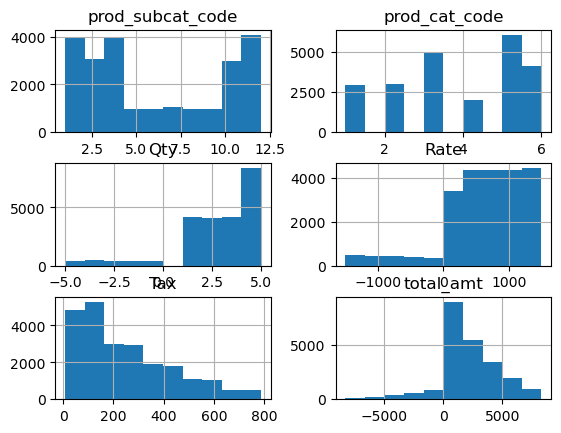

In [17]:
plt.figure(figsize=(10,8))
cont_var.hist()
plt.show()

<Axes: xlabel='count', ylabel='Gender'>

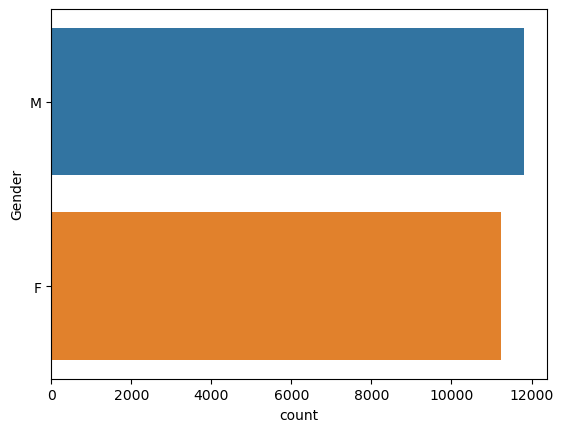

In [18]:
# 3 FREQUENCY BARS FOR CATEGORICAL VARIABLES
sns.countplot(y=Customer_final.Gender)

<Axes: xlabel='count', ylabel='Store_type'>

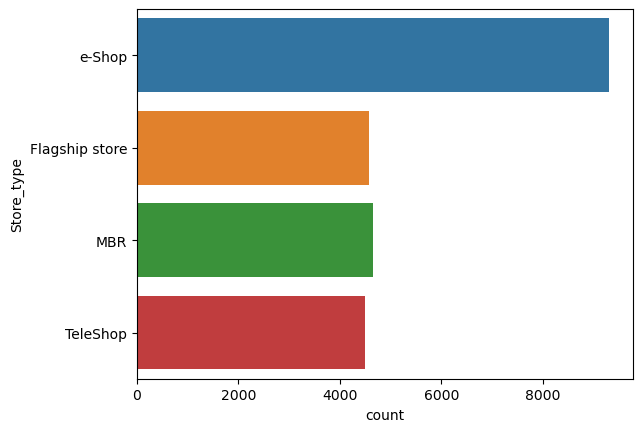

In [19]:
sns.countplot(y=Customer_final.Store_type)

<Axes: xlabel='count', ylabel='prod_cat'>

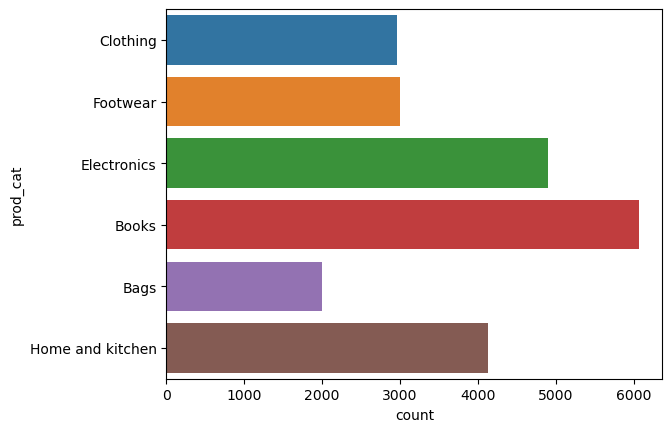

In [20]:
sns.countplot(y=Customer_final.prod_cat)

<Axes: xlabel='count', ylabel='prod_subcat'>

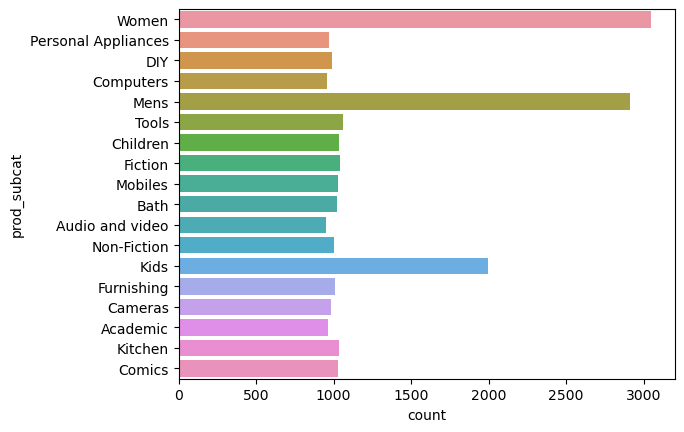

In [21]:
sns.countplot(y=Customer_final.prod_subcat)

In [22]:
# 4A.
Customer_final.sort_values(by="tran_date")


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat
12046,21830961921,267482,2011-01-02,10,3,4,455,191.100,2011.100,MBR,267482,29-07-1978,M,7.0,Electronics,Audio and video
14287,25374972356,268904,2011-01-02,2,6,5,821,431.025,4536.025,MBR,268904,25-05-1990,M,5.0,Home and kitchen,Furnishing
14272,40426008634,273429,2011-01-02,2,6,1,1132,118.860,1250.860,e-Shop,273429,14-05-1974,M,9.0,Home and kitchen,Furnishing
1819,96261500165,270582,2011-01-02,3,2,2,734,154.140,1622.140,Flagship store,270582,01-07-1974,M,5.0,Footwear,Women
18391,14744074495,272122,2011-01-02,1,2,5,475,249.375,2624.375,TeleShop,272122,05-11-1984,M,4.0,Footwear,Mens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6006,12323853707,273552,2014-12-02,12,6,4,510,214.200,2254.200,TeleShop,273552,22-06-1987,F,10.0,Home and kitchen,Tools
7062,65228973233,270009,2014-12-02,11,5,2,301,63.210,665.210,e-Shop,270009,25-04-1979,M,3.0,Books,Children
6007,89214951500,273322,2014-12-02,12,6,1,1166,122.430,1288.430,TeleShop,273322,10-06-1983,F,1.0,Home and kitchen,Tools
14160,36792372906,275246,2014-12-02,2,6,1,1185,124.425,1309.425,e-Shop,275246,25-06-1970,M,3.0,Home and kitchen,Furnishing


In [23]:
min_date = Customer_final["tran_date"].min()

In [24]:
max_date = Customer_final["tran_date"].max()

In [25]:
print("Time period of the available transaction data is from "+ pd.Timestamp.strftime(min_date,format="%d-%m-%Y") + " to " + pd.Timestamp.strftime(max_date,format="%d-%m-%Y"))

Time period of the available transaction data is from 02-01-2011 to 02-12-2014


In [26]:
# 4B
ngt_trans = Customer_final.loc[Customer_final["total_amt"] < 0,"transaction_id"].count()

In [27]:
print("Count of transactions where the total amount of transaction was negative is",ngt_trans)

Count of transactions where the total amount of transaction was negative is 2164


In [28]:
# 5
prod_gender = Customer_final.groupby(["Gender","prod_cat"])[["Qty"]].sum().reset_index()


In [29]:
prod_gender.head()

,Gender,prod_cat,Qty
0,F,Bags,2364
1,F,Books,7080
2,F,Clothing,3425
3,F,Electronics,5832
4,F,Footwear,3721


In [30]:
prod_gender.pivot(index="Gender",columns="prod_cat",values="Qty")
#Products that are popular among males are 
#Books
#lothing
#Electronics
#Home and kitchen
#Products that are popular among females are:
#Bags
#Footwear


prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2364,7080,3425,5832,3721,4898
M,2346,7587,3748,6486,3561,5051


In [31]:
# 6
customer_city = Customer_final.groupby('city_code')['customer_Id'].count().sort_values(ascending =False)

In [32]:
customer_city
# CITY CODE 4.0 has maximum customers

city_code
4.0     2422
3.0     2410
5.0     2357
7.0     2356
10.0    2333
8.0     2328
2.0     2268
1.0     2255
9.0     2176
6.0     2127
Name: customer_Id, dtype: int64

In [33]:
percentage = round((customer_city[4.0] / customer_city.sum()) * 100,2)

In [34]:
percentage
# 10.52% was the percentage of customers from city code 4.0

10.52

In [35]:
# 7
Customer_final.groupby("Store_type")[["Qty","Rate"]].sum().sort_values(by="Qty",ascending=False)


,Qty,Rate
Store_type,,
e-Shop,22790,5945770
MBR,11195,2953665
Flagship store,11142,2942874
TeleShop,10993,2836359


In [36]:
print('e-Shop store sell the maximum products by value n qty')

e-Shop store sell the maximum products by value n qty


In [37]:
#8
store_cat = Customer_final.pivot_table(index = "prod_cat",columns="Store_type", values="total_amt", aggfunc='sum')

In [38]:
store_cat

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.835,848678.675,789181.055,1617933.265
Books,2493677.810,2496039.195,2545714.470,5297161.155
Clothing,1194423.230,1287686.335,1241834.360,2527193.565
Electronics,2215136.040,2107969.825,1978457.195,4429142.770
Footwear,1234806.560,1112163.715,1235719.290,2643215.250
Home and kitchen,1713004.150,1822403.570,1581227.375,3327977.120


In [39]:
store_cat.loc[["Clothing","Electronics"],"Flagship store"]

prod_cat
Clothing       1194423.23
Electronics    2215136.04
Name: Flagship store, dtype: float64

In [40]:
store_cat.loc[["Clothing","Electronics"],"Flagship store"].sum()


3409559.27

In [41]:
#9
elect_m = Customer_final.pivot_table(index = "prod_cat",columns="Gender", values="total_amt", aggfunc='sum')

In [42]:
elect_m

Gender,F,M
prod_cat,,
Bags,2079618.840,2046722.990
Books,6174590.825,6645972.775
Clothing,3026750.805,3224079.495
Electronics,5019354.210,5711351.620
Footwear,3203155.215,3020200.365
Home and kitchen,4133702.235,4305169.505


In [43]:
male_earning = elect_m.loc["Electronics","M"]

In [44]:
#The total amount earned from Male customers under the Electronics category is 5711351.62
male_earning

5711351.62

In [45]:
#10
pst_trans = Customer_final.loc[Customer_final["total_amt"]>0,:]

In [46]:
pst_trans

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat
1,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,Women
2,18505840838,271509,2013-12-16,1,1,3,1229,387.135,4074.135,Flagship store,271509,08-06-1981,M,3.0,Clothing,Women
4,92814475704,267750,2013-07-08,1,1,4,284,119.280,1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,Women
5,4737317330,269345,2011-07-29,1,1,5,1141,599.025,6304.025,MBR,269345,26-06-1970,F,10.0,Clothing,Women
6,44425889101,274987,2012-03-18,1,1,4,897,376.740,3964.740,Flagship store,274987,08-10-1983,M,2.0,Clothing,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,7173864364,271157,2011-09-04,4,4,5,788,413.700,4353.700,Flagship store,271157,15-10-1973,F,6.0,Bags,Women
23049,5618131425,272010,2011-03-03,4,4,2,1150,241.500,2541.500,MBR,272010,22-12-1972,F,5.0,Bags,Women
23050,18727956164,267161,2011-02-23,4,4,5,668,350.700,3690.700,e-Shop,267161,08-05-1981,M,9.0,Bags,Women
23051,60416814232,273281,2011-02-18,4,4,4,202,84.840,892.840,Flagship store,273281,14-12-1988,F,9.0,Bags,Women


In [47]:
unique_trans = pst_trans.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()

In [48]:
unique_trans

,customer_Id,prod_cat,prod_subcat,transaction_id
0,266783,Books,Non-Fiction,1
1,266783,Clothing,Mens,2
2,266783,Footwear,Mens,1
3,266784,Books,Fiction,1
4,266784,Books,Non-Fiction,1
...,...,...,...,...
19273,275264,Books,Non-Fiction,1
19274,275264,Home and kitchen,Tools,1
19275,275265,Bags,Mens,1
19276,275265,Books,Academic,1


In [49]:
unique_trans_1 = unique_trans.groupby('customer_Id')['transaction_id'].count().reset_index()

In [50]:
unique_trans_1.head()

,customer_Id,transaction_id
0,266783,3
1,266784,3
2,266785,5
3,266788,4
4,266794,8


In [51]:
#There are no unique transactions greater than 10
unique_trans_1[unique_trans_1['transaction_id'] > 10]

,customer_Id,transaction_id


In [52]:
#11A

now = pd.Timestamp('now')
Customer_final['DOB'] = pd.to_datetime(Customer_final['DOB'], format='mixed')
Customer_final['DOB'] = Customer_final['DOB'].where(Customer_final['DOB'] < now, Customer_final['DOB'] -  np.timedelta64(100, 'Y'))
Customer_final['AGE'] = Customer_final['DOB'].apply(lambda x: (now.year-x.year))
                                

In [53]:
Customer_final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat,AGE
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,270351,1981-09-26,M,5.0,Clothing,Women,43
1,80712190438,270351,2014-02-20,1,1,5,772,405.3,4265.3,e-Shop,270351,1981-09-26,M,5.0,Clothing,Women,43


In [54]:
Customer_final['Age_cat'] = pd.cut(Customer_final['AGE'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)

In [55]:
Customer_final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat,AGE,Age_cat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,Women,43,36-46
1,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,Women,43,36-46
2,18505840838,271509,2013-12-16,1,1,3,1229,387.135,4074.135,Flagship store,271509,1981-08-06,M,3.0,Clothing,Women,43,36-46
3,92814475704,267750,2013-08-16,1,1,-4,-284,119.280,-1255.280,Flagship store,267750,1986-10-13,M,1.0,Clothing,Women,38,36-46
4,92814475704,267750,2013-07-08,1,1,4,284,119.280,1255.280,Flagship store,267750,1986-10-13,M,1.0,Clothing,Women,38,36-46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,7173864364,271157,2011-09-04,4,4,5,788,413.700,4353.700,Flagship store,271157,1973-10-15,F,6.0,Bags,Women,51,47-57
23049,5618131425,272010,2011-03-03,4,4,2,1150,241.500,2541.500,MBR,272010,1972-12-22,F,5.0,Bags,Women,52,47-57
23050,18727956164,267161,2011-02-23,4,4,5,668,350.700,3690.700,e-Shop,267161,1981-08-05,M,9.0,Bags,Women,43,36-46
23051,60416814232,273281,2011-02-18,4,4,4,202,84.840,892.840,Flagship store,273281,1988-12-14,F,9.0,Bags,Women,36,36-46


In [56]:
cust_25_35 = Customer_final.groupby(['Age_cat','prod_cat'])['total_amt'].sum()

In [57]:
cust_25_35.head()

Age_cat  prod_cat   
25-35    Bags            696442.825
         Books          2109168.750
         Clothing       1179706.840
         Electronics    1819757.095
         Footwear       1104650.820
Name: total_amt, dtype: float64

In [58]:
cust_25_35.loc['25-35',['Books','Electronics']]

Age_cat  prod_cat   
25-35    Books          2109168.750
         Electronics    1819757.095
Name: total_amt, dtype: float64

In [59]:
print("Total amount spent on 'Electronics' and 'Books' product categories is", 
      cust_25_35.loc['25-35',['Books','Electronics']].sum().round(2))

Total amount spent on 'Electronics' and 'Books' product categories is 3928925.84


In [60]:
#11b
customer_total_amount_25_35 = Customer_final[Customer_final['Age_cat']=='25-35']


In [61]:
customer_total_amount_25_35

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat,AGE,Age_cat
7,90501340928,271817,2012-02-19,1,1,1,1122,117.810,1239.810,TeleShop,271817,1989-12-24,M,8.0,Clothing,Women,35,25-35
11,90954125896,269387,2013-03-18,1,1,4,839,352.380,3708.380,MBR,269387,1990-03-02,F,10.0,Clothing,Women,34,25-35
23,57134739558,270625,2014-02-14,1,1,5,595,312.375,3287.375,TeleShop,270625,1992-03-02,M,6.0,Clothing,Women,32,25-35
24,42584381402,270625,2012-06-22,1,1,5,1371,719.775,7574.775,TeleShop,270625,1992-03-02,M,6.0,Clothing,Women,32,25-35
29,4510550124,273763,2013-09-26,1,1,4,504,211.680,2227.680,e-Shop,273763,1990-07-26,F,3.0,Clothing,Women,34,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23013,59648346258,272338,2011-09-23,4,4,3,1161,365.715,3848.715,MBR,272338,1989-05-20,F,6.0,Bags,Women,35,25-35
23014,2092439489,267181,2012-01-31,4,4,1,159,16.695,175.695,MBR,267181,1989-12-02,M,7.0,Bags,Women,35,25-35
23017,55267258802,270825,2011-12-24,4,4,5,690,362.250,3812.250,Flagship store,270825,1990-12-07,M,4.0,Bags,Women,34,25-35
23038,54823294459,274527,2011-03-20,4,4,1,1014,106.470,1120.470,Flagship store,274527,1991-10-02,F,8.0,Bags,Women,33,25-35


In [62]:
total_amount = customer_total_amount_25_35[(customer_total_amount_25_35['tran_date'] >='2014-01-01') & (customer_total_amount_25_35['tran_date'] <='2014-03-01')]

In [63]:
total_amount

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat,AGE,Age_cat
23,57134739558,270625,2014-02-14,1,1,5,595,312.375,3287.375,TeleShop,270625,1992-03-02,M,6.0,Clothing,Women,32,25-35
45,65582112405,267243,2014-01-29,1,1,3,1259,396.585,4173.585,e-Shop,267243,1990-03-19,F,6.0,Clothing,Women,34,25-35
78,22826695874,270949,2014-01-31,1,1,4,1481,622.020,6546.020,e-Shop,270949,1990-09-12,M,9.0,Clothing,Women,34,25-35
98,42789741259,266853,2014-01-26,1,1,2,1152,241.920,2545.920,MBR,266853,1990-09-18,M,6.0,Clothing,Women,34,25-35
101,29982163778,272482,2014-01-25,1,1,3,1499,472.185,4969.185,e-Shop,272482,1992-01-21,F,2.0,Clothing,Women,32,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22108,29893265549,267656,2014-01-25,4,4,3,962,303.030,3189.030,MBR,267656,1991-07-15,M,3.0,Bags,Women,33,25-35
22199,47691273998,272059,2014-01-15,4,4,4,146,61.320,645.320,Flagship store,272059,1991-07-22,F,6.0,Bags,Women,33,25-35
22204,38702596038,274594,2014-01-14,4,4,5,815,427.875,4502.875,e-Shop,274594,1989-01-21,M,5.0,Bags,Women,35,25-35
22206,69724469724,271352,2014-01-14,4,4,1,861,90.405,951.405,MBR,271352,1992-07-18,M,8.0,Bags,Women,32,25-35


In [64]:
print('The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is',
      total_amount['total_amt'].sum())

The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is 302707.015
